Automating Crypto Website API Pull

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



In [3]:
type(data)

dict

In [4]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11945,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982547e+07,1.982547e+07,False,NaN,1,NaN,NaN,None,2025-02-17T08:11:00.000Z,96114.683653,1.946306e+10,30.4130,-0.271960,-1.252572,-1.792750,-6.169685,-5.209882,4.773109,1.905519e+12,59.9466,2.018408e+12,None,2025-02-17T08:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 13:43:00.469416
1,1027,Ethereum,ETH,ethereum,9931,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205553e+08,1.205553e+08,True,NaN,2,NaN,NaN,None,2025-02-17T08:11:00.000Z,2687.612974,1.266751e+10,34.0069,-0.139050,-0.357127,1.408491,-17.896894,-26.876337,-13.891416,3.240059e+11,10.1931,3.240059e+11,None,2025-02-17T08:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 13:43:00.469416
2,52,XRP,XRP,xrp,1534,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.781886e+10,9.998645e+10,False,NaN,3,NaN,NaN,None,2025-02-17T08:11:00.000Z,2.660837,4.064180e+09,3.6579,-0.817639,-3.791217,9.727084,-13.582832,12.493001,140.962357,1.538466e+11,4.8399,2.660837e+11,None,2025-02-17T08:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 13:43:00.469416
3,825,Tether USDt,USDT,tether,116891,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.419965e+11,1.435668e+11,True,NaN,4,NaN,NaN,None,2025-02-17T08:10:00.000Z,0.999965,5.304492e+10,16.9213,-0.005274,-0.010661,-0.015606,0.047505,0.043598,-0.058060,1.419915e+11,4.4665,1.435618e+11,None,2025-02-17T08:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-17 13:43:00.469416
4,1839,BNB,BNB,bnb,2362,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424774e+08,1.424774e+08,False,NaN,5,NaN,NaN,None,2025-02-17T08:11:00.000Z,670.487517,2.083515e+09,21.2983,-0.442387,2.422783,10.011747,-3.620893,-4.122481,8.493991,9.552934e+10,3.0050,9.552934e+10,None,2025-02-17T08:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 13:43:00.469416
5,5426,Solana,SOL,solana,840,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.883896e+08,5.942281e+08,True,NaN,6,NaN,NaN,None,2025-02-17T08:10:00.000Z,181.991811,2.909135e+09,74.5348,-0.753501,-5.820192,-11.178346,-21.405467,-13.572546,-25.229179,8.888290e+10,2.7959,1.081446e+11,None,2025-02-17T08:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 13:43:00.469416
6,3408,USDC,USDC,usd-coin,25722,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.647451e+10,5.647451e+10,False,NaN,7,NaN,NaN,None,2025-02-17T08:10:00.000Z,0.999947,5.033297e+09,22.3941,0.002532,-0.001278,-0.001190,0.004512,-0.001352,0.001865,5.647150e+10,1.7764,5.647150e+10,None,2025-02-17T08:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-17 13:43:00.469416
7,74,Dogecoin,DOGE,dogecoin,1163,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.480806e+11,1.480806e+11,True,NaN,8,NaN,NaN,None,2025-02-17T08:11:00.000Z,0.260074,1.085360e+09,-15.4998,-1.208487,-3.605462,3.024163,-33.356656,-27.945018,-33.137719,3.851191e+10,1.2114,3.851191e+10,None,2025-02-17T08:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 13:43:00.469416
8,2010,Cardano,ADA,cardano,1461,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",

In [17]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\Admin\Documents\automtic file sorter\API.csv'):
        df.to_csv(r'C:\Users\Admin\Documents\automtic file sorter\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Admin\Documents\automtic file sorter\API.csv', mode='a', header=False)
        
  

In [81]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [83]:
df72 = pd.read_csv(r'C:\Users\Admin\Documents\automtic file sorter\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11945,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19825471.00000,19825471.00000,False,NaN,1,NaN,NaN,NaN,2025-02-17T08:28:00.000Z,96081.73142,20322909904.65114,35.95630,-0.05998,-1.19378,-1.65681,-6.42906,-5.48918,4.83502,1904865579995.76904,59.80540,2017716359924.62012,NaN,2025-02-17T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 13:59:27.964003
1,1,1027,Ethereum,ETH,ethereum,9931,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120555264.23101,120555264.23101,True,NaN,2,NaN,NaN,NaN,2025-02-17T08:27:00.000Z,2688.41780,11994758318.57694,17.23160,-0.00202,-0.44911,1.66750,-17.86950,-26.95690,-13.71913,324102917658.07367,10.17940,324102917658.07001,NaN,2025-02-17T08:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 13:59:27.964003
2,2,52,XRP,XRP,xrp,1534,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57818864895.00000,99986451428.00000,False,NaN,3,NaN,NaN,NaN,2025-02-17T08:28:00.000Z,2.65306,4098562216.17261,5.32480,-0.33786,-4.29585,9.23624,-14.23234,12.08306,143.58978,153397024408.19299,4.81790,265306184558.91000,NaN,2025-02-17T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 13:59:27.964003
3,3,825,Tether USDt,USDT,tether,116893,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,141996505143.64334,143566824829.42120,True,NaN,4,NaN,NaN,NaN,2025-02-17T08:28:00.000Z,1.00009,53517347464.22274,20.96010,-0.00434,-0.00772,-0.01030,0.06990,0.05709,-0.05089,142009700910.54160,4.46120,143580166526.48001,NaN,2025-02-17T08:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-17 13:59:27.964003
4,4,1839,BNB,BNB,bnb,2362,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142477439.75000,142477439.75000,False,NaN,5,NaN,NaN,NaN,2025-02-17T08:28:00.000Z,667.67052,2084275581.73789,21.23950,-0.47108,1.81071,9.78997,-4.36178,-4.65045,8.28012,95127985661.68608,2.98840,95127985661.69000,NaN,2025-02-17T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 13:59:27.964003
5,5,5426,Solana,SOL,solana,840,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,488389540.77998,594228088.02711,True,NaN,6,NaN,NaN,NaN,2025-02-17T08:27:00.000Z,181.69936,2966407196.68993,77.57840,-0.21025,-6.16160,-10.98939,-23.12960,-13.56284,-25.81598,88740067104.69051,2.78780,107970863427.59000,NaN,2025-02-17T08:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 13:59:27.964003
6,6,3408,USDC,USDC,usd-coin,25722,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,56473498538.00922,56473498538.00922,False,NaN,7,NaN,NaN,NaN,2025-02-17T08:28:00.000Z,1.00006,5083604456.26285,23.93200,0.00030,0.00173,0.00475,0.02034,0.00679,0.01527,56476786037.52962,1.77420,56476786037.53000,NaN,2025-02-17T08:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-17 13:59:27.964003
7,7,74,Dogecoin,DOGE,dogecoin,1163,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,148080576383.70520,148080576383.70520,True,NaN,8,NaN,NaN,NaN,2025-02-17T08:28:00.000Z,0.25977,1089290988.05090,-14.63180,-0.68094,-3.90880,2.93103,-33.89941,-27.99850,-32.00881,38467545196.02348,1.20850,38467545196.02000,NaN,2025-0

In [85]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11945,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19825487.00000,19825487.00000,False,NaN,1,NaN,NaN,None,2025-02-17T09:10:00.000Z,96190.77779,19898995141.59856,25.72140,0.07189,-0.98144,-1.67283,-6.75449,-5.42358,4.67032,1907029014653.53809,59.71370,2020006333651.43994,None,2025-02-17T09:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 14:40:37.843096
1,1027,Ethereum,ETH,ethereum,9931,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120555264.23101,120555264.23101,True,NaN,2,NaN,NaN,None,2025-02-17T09:09:00.000Z,2717.67782,13336679593.84605,31.00340,1.20141,0.80361,2.77038,-17.31244,-25.94476,-13.06164,327630368184.59204,10.25960,327630368184.59003,None,2025-02-17T09:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 14:40:37.843096
2,52,XRP,XRP,xrp,1534,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57818864895.00000,99986451428.00000,False,NaN,3,NaN,NaN,None,2025-02-17T09:09:00.000Z,2.67960,4162663247.38323,8.80300,0.85427,-2.87646,9.49512,-14.39135,13.60002,143.02097,154931392718.79160,4.85160,267959934876.19000,None,2025-02-17T09:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 14:40:37.843096
3,825,Tether USDt,USDT,tether,116897,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,141996505143.64334,143566824829.42120,True,NaN,4,NaN,NaN,None,2025-02-17T09:09:00.000Z,1.00001,54718820045.82661,21.06400,-0.00274,-0.00875,-0.03109,0.04791,0.03355,-0.04684,141997383489.30722,4.44660,143567712888.59000,None,2025-02-17T09:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-17 14:40:37.843096
4,1839,BNB,BNB,bnb,2362,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142477436.35000,142477436.35000,False,NaN,5,NaN,NaN,None,2025-02-17T09:10:00.000Z,670.95160,2095909499.49960,22.18480,0.08226,2.37273,10.96585,-4.34742,-4.20283,8.54204,95595464477.12819,2.99360,95595464477.13000,None,2025-02-17T09:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 14:40:37.843096
5,5426,Solana,SOL,solana,840,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,488389520.13774,594228067.38097,True,NaN,6,NaN,NaN,None,2025-02-17T09:09:00.000Z,184.30636,3074458640.47166,84.17480,1.56960,-4.53342,-10.26966,-22.71835,-11.82453,-24.93803,90013296133.11795,2.81880,109520013829.72000,None,2025-02-17T09:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 14:40:37.843096
6,3408,USDC,USDC,usd-coin,25722,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,56473252142.02369,56473252142.02369,False,NaN,7,NaN,NaN,None,2025-02-17T09:10:00.000Z,0.99996,5216519431.49076,27.68250,0.00131,-0.00083,-0.00499,0.01563,-0.01686,0.00326,56470983881.12046,1.76840,56470983881.12000,None,2025-02-17T09:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-17 14:40:37.843096
7,74,Dogecoin,DOGE,dogecoin,1163,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,148080776383.70517,148080776383.70517,True,NaN,8,NaN,NaN,None,2025-02-17T09:09:00.000Z,0.26229,1096970940.47705,-13.82060,1.01194,-2.58915,3.77105,-34.34792,-27.06421,-31.94318,38839820874.90402,1.21630,38839820874.90000,None,2025-02-17T09:09:00.

In [87]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [89]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11945,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19825487.00000,19825487.00000,False,NaN,1,NaN,NaN,None,2025-02-17T09:10:00.000Z,96190.77779,19898995141.59856,25.72140,0.07189,-0.98144,-1.67283,-6.75449,-5.42358,4.67032,1907029014653.53809,59.71370,2020006333651.43994,None,2025-02-17T09:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 14:40:37.843096
1,1027,Ethereum,ETH,ethereum,9931,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120555264.23101,120555264.23101,True,NaN,2,NaN,NaN,None,2025-02-17T09:09:00.000Z,2717.67782,13336679593.84605,31.00340,1.20141,0.80361,2.77038,-17.31244,-25.94476,-13.06164,327630368184.59204,10.25960,327630368184.59003,None,2025-02-17T09:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 14:40:37.843096
2,52,XRP,XRP,xrp,1534,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57818864895.00000,99986451428.00000,False,NaN,3,NaN,NaN,None,2025-02-17T09:09:00.000Z,2.67960,4162663247.38323,8.80300,0.85427,-2.87646,9.49512,-14.39135,13.60002,143.02097,154931392718.79160,4.85160,267959934876.19000,None,2025-02-17T09:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 14:40:37.843096
3,825,Tether USDt,USDT,tether,116897,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,141996505143.64334,143566824829.42120,True,NaN,4,NaN,NaN,None,2025-02-17T09:09:00.000Z,1.00001,54718820045.82661,21.06400,-0.00274,-0.00875,-0.03109,0.04791,0.03355,-0.04684,141997383489.30722,4.44660,143567712888.59000,None,2025-02-17T09:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-17 14:40:37.843096
4,1839,BNB,BNB,bnb,2362,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142477436.35000,142477436.35000,False,NaN,5,NaN,NaN,None,2025-02-17T09:10:00.000Z,670.95160,2095909499.49960,22.18480,0.08226,2.37273,10.96585,-4.34742,-4.20283,8.54204,95595464477.12819,2.99360,95595464477.13000,None,2025-02-17T09:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 14:40:37.843096
5,5426,Solana,SOL,solana,840,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,488389520.13774,594228067.38097,True,NaN,6,NaN,NaN,None,2025-02-17T09:09:00.000Z,184.30636,3074458640.47166,84.17480,1.56960,-4.53342,-10.26966,-22.71835,-11.82453,-24.93803,90013296133.11795,2.81880,109520013829.72000,None,2025-02-17T09:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-17 14:40:37.843096
6,3408,USDC,USDC,usd-coin,25722,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,56473252142.02369,56473252142.02369,False,NaN,7,NaN,NaN,None,2025-02-17T09:10:00.000Z,0.99996,5216519431.49076,27.68250,0.00131,-0.00083,-0.00499,0.01563,-0.01686,0.00326,56470983881.12046,1.76840,56470983881.12000,None,2025-02-17T09:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-17 14:40:37.843096
7,74,Dogecoin,DOGE,dogecoin,1163,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,148080776383.70517,148080776383.70517,True,NaN,8,NaN,NaN,None,2025-02-17T09:09:00.000Z,0.26229,1096970940.47705,-13.82060,1.01194,-2.58915,3.77105,-34.34792,-27.06421,-31.94318,38839820874.90402,1.21630,38839820874.90000,None,2025-02-17T09:09:00.

In [91]:

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.07189,-0.98144,-1.67283,-6.75449,-5.42358,4.67032
Ethereum,1.20141,0.80361,2.77038,-17.31244,-25.94476,-13.06164
XRP,0.85427,-2.87646,9.49512,-14.39135,13.60002,143.02097
Tether USDt,-0.00274,-0.00875,-0.03109,0.04791,0.03355,-0.04684
BNB,0.08226,2.37273,10.96585,-4.34742,-4.20283,8.54204
Solana,1.56960,-4.53342,-10.26966,-22.71835,-11.82453,-24.93803
USDC,0.00131,-0.00083,-0.00499,0.01563,-0.01686,0.00326
Dogecoin,1.01194,-2.58915,3.77105,-34.34792,-27.06421,-31.94318
Cardano,0.32123,2.66126,13.35306,-25.50633,-17.54979,6.02980


In [93]:
df4 = df3.stack()
print(df4)

name                                     
Bitcoin      quote.USD.percent_change_1h      0.07189
             quote.USD.percent_change_24h    -0.98144
             quote.USD.percent_change_7d     -1.67283
             quote.USD.percent_change_30d    -6.75449
             quote.USD.percent_change_60d    -5.42358
             quote.USD.percent_change_90d     4.67032
Ethereum     quote.USD.percent_change_1h      1.20141
             quote.USD.percent_change_24h     0.80361
             quote.USD.percent_change_7d      2.77038
             quote.USD.percent_change_30d   -17.31244
             quote.USD.percent_change_60d   -25.94476
             quote.USD.percent_change_90d   -13.06164
XRP          quote.USD.percent_change_1h      0.85427
             quote.USD.percent_change_24h    -2.87646
             quote.USD.percent_change_7d      9.49512
             quote.USD.percent_change_30d   -14.39135
             quote.USD.percent_change_60d    13.60002
             quote.USD.percent_change_90

In [95]:
type(df4)

pandas.core.series.Series

In [97]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.07189
            quote.USD.percent_change_24h  -0.98144
            quote.USD.percent_change_7d   -1.67283
            quote.USD.percent_change_30d  -6.75449
            quote.USD.percent_change_60d  -5.42358
            quote.USD.percent_change_90d   4.67032
Ethereum    quote.USD.percent_change_1h    1.20141
            quote.USD.percent_change_24h   0.80361
            quote.USD.percent_change_7d    2.77038
            quote.USD.percent_change_30d -17.31244
            quote.USD.percent_change_60d -25.94476
            quote.USD.percent_change_90d -13.06164
XRP         quote.USD.percent_change_1h    0.85427
            quote.USD.percent_change_24h  -2.87646
            quote.USD.percent_change_7d    9.49512
            quote.USD.percent_change_30d -14.39135
            quote.USD.percent_change_60d  13.60002
            quote.USD.percent_change_90d 143.02097
Tether USDt quote.USD.percent_change_1h   -0.00274
            quote.USD.percent_change_24h  -0.00875
            quote.USD.percent_change_7d   -0.03109
            quote.USD.percent_change_30d   0.04791
            quote.USD.percent_change_60d   0.03355
            quote.USD.percent_change_90d  -0.04684
BNB         quote.USD.percent_change_1h    0.08226
            quote.USD.percent_change_24h   2.37273
            quote.USD.percent_change_7d   10.96585
            quote.USD.percent_change_30d  -4.34742
            quote.USD.percent_change_60d  -4.20283
            quote.USD.percent_change_90d   8.54204
Solana      quote.USD.percent_change_1h    1.56960
            quote.USD.percent_change_24h  -4.53342
            quote.USD.percent_change_7d  -10.26966
            quote.USD.percent_change_30d -22.71835
            quote.USD.percent_change_60d -11.82453
            quote.USD.percent_change_90d -24.93803
USDC        quote.USD.percent_change_1h    0.00131
            quote.USD.percent_change_24h  -0.00083
            quote.USD.percent_change_7d   -0.00499
            quote.USD.percent_change_30d   0.01563
            quote.USD.percent_change_60d  -0.01686
            quote.USD.percent_change_90d   0.00326
Dogecoin    quote.USD.percent_change_1h    1.01194
            quote.USD.percent_change_24h  -2.58915
            quote.USD.percent_change_7d    3.77105
            quote.USD.percent_change_30d -34.34792
            quote.USD.percent_change_60d -27.06421
            quote.USD.percent_change_90d -31.94318
Cardano     quote.USD.percent_change_1h    0.32123
            quote.USD.percent_change_24h   2.66126
            quote.USD.percent_change_7d   13.35306
            quote.USD.percent_change_30d -25.50633
            quote.USD.percent_change_60d -17.54979
            quote.USD.percent_change_90d   6.02980
TRON        quote.USD.percent_change_1h    0.35716
            quote.USD.percent_change_24h   3.12925
            quote.USD.percent_change_7d    3.82964
            quote.USD.percent_change_30d   1.83949
            quote.USD.percent_change_60d  -6.72516
            quote.USD.percent_change_90d  21.23265
Chainlink   quote.USD.percent_change_1h    1.79315
            quote.USD.percent_change_24h   1.13731
            quote.USD.percent_change_7d    1.33606
            quote.USD.percent_change_30d -21.26583
            quote.USD.percent_change_60d -22.29884
            quote.USD.percent_change_90d  28.43431
Avalanche   quote.USD.percent_change_1h    1.05401
            quote.USD.percent_change_24h   0.00463
            quote.USD.percent_change_7d   -1.55684
            quote.USD.percent_change_30d -35.69792
            quote.USD.percent_change_60d -40.33998
            quote.USD.percent_change_90d -27.81711
Stellar     quote.USD.percent_change_1h    0.75849
            quote.USD.percent_change_24h  -1.35883
            quote.USD.percent_change_7d    6.72714
            quote.USD.percent_change_30d -26.27655
            quote.USD.percent_change_60d -15.58480
            quo

In [99]:
df5.count()

values    90
dtype: int64

In [101]:

index = pd.Index(range(90))
df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.07189
1,Bitcoin,quote.USD.percent_change_24h,-0.98144
2,Bitcoin,quote.USD.percent_change_7d,-1.67283
3,Bitcoin,quote.USD.percent_change_30d,-6.75449
4,Bitcoin,quote.USD.percent_change_60d,-5.42358
5,Bitcoin,quote.USD.percent_change_90d,4.67032
6,Ethereum,quote.USD.percent_change_1h,1.20141
7,Ethereum,quote.USD.percent_change_24h,0.80361
8,Ethereum,quote.USD.percent_change_7d,2.77038
9,Ethereum,quote.USD.percent_change_30d,-17.31244


In [103]:

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.07189
1,Bitcoin,quote.USD.percent_change_24h,-0.98144
2,Bitcoin,quote.USD.percent_change_7d,-1.67283
3,Bitcoin,quote.USD.percent_change_30d,-6.75449
4,Bitcoin,quote.USD.percent_change_60d,-5.42358
5,Bitcoin,quote.USD.percent_change_90d,4.67032
6,Ethereum,quote.USD.percent_change_1h,1.20141
7,Ethereum,quote.USD.percent_change_24h,0.80361
8,Ethereum,quote.USD.percent_change_7d,2.77038
9,Ethereum,quote.USD.percent_change_30d,-17.31244


In [105]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.07189
1,Bitcoin,24h,-0.98144
2,Bitcoin,7d,-1.67283
3,Bitcoin,30d,-6.75449
4,Bitcoin,60d,-5.42358
5,Bitcoin,90d,4.67032
6,Ethereum,1h,1.20141
7,Ethereum,24h,0.80361
8,Ethereum,7d,2.77038
9,Ethereum,30d,-17.31244


In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

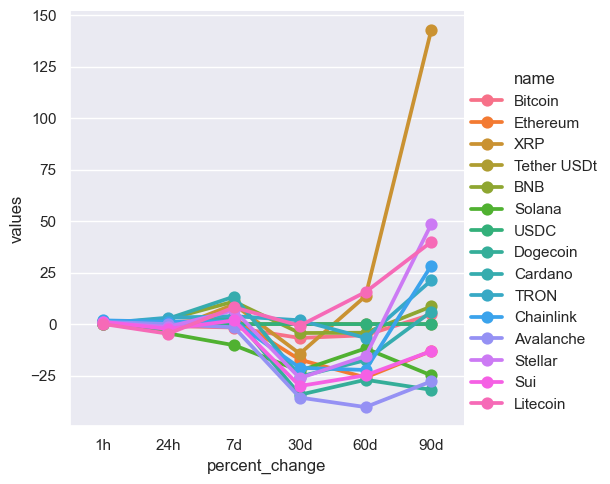

In [109]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [133]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df72[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,96081.73142,2025-02-17 13:59:27.964003
15,Bitcoin,96072.99588,2025-02-17 14:00:30.307414
30,Bitcoin,96195.17178,2025-02-17 14:33:09.489900
45,Bitcoin,96179.47248,2025-02-17 14:34:10.233599
60,Bitcoin,96145.61375,2025-02-17 14:35:11.006517
75,Bitcoin,96130.60190,2025-02-17 14:36:34.570929
90,Bitcoin,96116.92226,2025-02-17 14:37:35.421622
105,Bitcoin,96116.92226,2025-02-17 14:38:36.247166
120,Bitcoin,96113.89393,2025-02-17 14:39:37.068559
135,Bitcoin,96190.77779,2025-02-17 14:40:37.843096


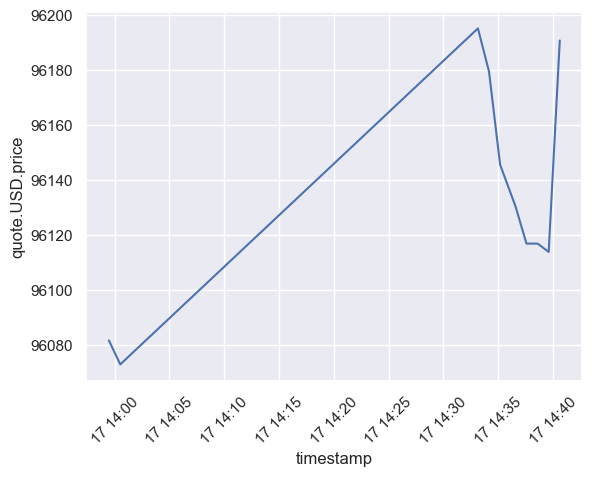

In [145]:
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)

plt.xticks(rotation=45)  
plt.show()
